<a href="https://colab.research.google.com/github/vkgithub1556/AirbnbProject/blob/master/airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
age_gen_df = pd.read_csv("/content/drive/My Drive/Data/airbnb/age_gender_bkts.csv")
age_gen_df.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [ ]:
age_gen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_bucket               420 non-null    object 
 1   country_destination      420 non-null    object 
 2   gender                   420 non-null    object 
 3   population_in_thousands  420 non-null    float64
 4   year                     420 non-null    float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB


FInding average of each age group and adding as another column

In [ ]:
age_gen_df['age_bucket']=age_gen_df['age_bucket'].apply(lambda x: '100-104' if x == '100+' else x)
age_gen_df['mean_age']=age_gen_df['age_bucket'].apply(lambda x: (int(x.split('-')[0])+int(x.split('-')[1]))/2)

In [ ]:
age_gen_df=age_gen_df.drop({'age_bucket','year'},axis=1)

In [ ]:
age_gen_df

,country_destination,gender,population_in_thousands,mean_age
0,AU,male,1.0,102.0
1,AU,male,9.0,97.0
2,AU,male,47.0,92.0
3,AU,male,118.0,87.0
4,AU,male,199.0,82.0
...,...,...,...,...
415,US,male,115.0,97.0
416,US,male,541.0,92.0
417,US,female,10570.0,17.0
418,US,male,1441.0,87.0


List of all destination countries and their counts

In [ ]:
list(age_gen_df['country_destination'].unique())
age_gen_df['country_destination'].value_counts()

FR    42
NL    42
DE    42
CA    42
IT    42
ES    42
PT    42
US    42
AU    42
GB    42
Name: country_destination, dtype: int64

In [ ]:
age_gen_df['gender'].value_counts()

female    210
male      210
Name: gender, dtype: int64

making gender values as gategorical values replacinf male with 0 and female with 1

In [ ]:
age_gen_df['gender']=age_gen_df['gender'].apply(lambda x:0 if x =='male' else 1)
age_gen_df['gender'].value_counts()

1    210
0    210
Name: gender, dtype: int64

Reading countries data

In [ ]:
countries = pd.read_csv('/content/drive/My Drive/Data/airbnb/countries.csv')

In [ ]:
countries.head(20)

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


Reading sessions data

In [ ]:
sessions=pd.read_csv('/content/drive/My Drive/Data/airbnb/sessions.csv')

In [ ]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [ ]:
sessions.shape

(10567737, 6)

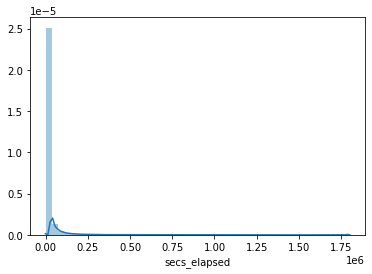

In [ ]:
sns.distplot(sessions[sessions['secs_elapsed'].notnull()]['secs_elapsed'])

In [ ]:
sessions['secs_elapsed'].describe()

count    1.043171e+07
mean     1.940581e+04
std      8.888424e+04
min      0.000000e+00
25%      2.290000e+02
50%      1.147000e+03
75%      8.444000e+03
max      1.799977e+06
Name: secs_elapsed, dtype: float64

In [ ]:
len(sessions[sessions['secs_elapsed'].isnull()])

136031

In [ ]:
median_session=sessions['secs_elapsed'].median()

In [ ]:
sessions['secs_elapsed']=sessions['secs_elapsed'].fillna(median_session)

In [ ]:
sessions['secs_elapsed'].describe()

count    1.056774e+07
mean     1.917078e+04
std      8.833430e+04
min      0.000000e+00
25%      2.370000e+02
50%      1.147000e+03
75%      8.193000e+03
max      1.799977e+06
Name: secs_elapsed, dtype: float64

As can be seen above, the interpolation has not significantly altered the summary statistics of the distribution. This is a good option for filling in the null values for the time being.



Let us check sessions which donot have any actions

In [ ]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [ ]:
no_action=sessions[(sessions['action'].isnull())|(sessions['action_detail'].isnull())|(sessions['action_type'].isnull())]

In [ ]:
no_action.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0


In [ ]:
no_action.shape

(1205830, 6)

Device types used to access irbnb

In [ ]:
sessions['device_type'].value_counts()

Mac Desktop                         3594286
Windows Desktop                     2658539
iPhone                              2105031
Android Phone                        839637
iPad Tablet                          683414
Android App Unknown Phone/Tablet     273652
-unknown-                            211279
Tablet                               139886
Linux Desktop                         28373
Chromebook                            22348
iPodtouch                              8198
Windows Phone                          2047
Blackberry                              979
Opera Phone                              68
Name: device_type, dtype: int64

activities without any device information

In [ ]:
len(sessions[sessions['device_type'].isnull()])

0

These are no sessions from unknown devices

**let us now analyse training users data for which we have to prediction their first destination**

In [ ]:
train_users=pd.read_csv("/content/drive/My Drive/Data/airbnb/train_users_2.csv")
train_users.head()


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


replacing unknown values in gender and first browser 

In [ ]:
train_users['gender']=train_users['gender'].replace('-unknown-',np.nan)
train_users['first_browser']=train_users['first_browser'].replace('-unknown-',np.nan)

In [ ]:
train_users.gender.astype(str)

0            nan
1           MALE
2         FEMALE
3         FEMALE
4            nan
           ...  
213446      MALE
213447       nan
213448       nan
213449       nan
213450       nan
Name: gender, Length: 213451, dtype: object

In [ ]:
train_users[train_users['age']>120]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
388,v2x0ms9c62,2010-04-11,20100411065602,2010-04-13,NaN,2014.0,basic,3,en,other,craigslist,untracked,Web,Windows Desktop,Firefox,FR
673,umf1wdk9uc,2010-05-25,20100525155541,NaN,FEMALE,2014.0,basic,2,en,other,craigslist,untracked,Web,Mac Desktop,Safari,NDF
1040,m82epwn7i8,2010-07-14,20100714230556,2010-07-15,MALE,2014.0,facebook,0,en,other,craigslist,untracked,Web,Mac Desktop,Chrome,US
1177,2th813zdx7,2010-07-25,20100725234419,2010-07-26,MALE,2013.0,facebook,3,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
1200,3amf04n3o3,2010-07-27,20100727190447,2010-07-29,FEMALE,2014.0,basic,2,en,direct,direct,untracked,Web,Windows Desktop,IE,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197386,99y83scsje,2014-05-31,20140531031949,2014-05-31,FEMALE,1938.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,IE,US
198888,io7z9esqaj,2014-06-03,20140603074958,2014-10-09,MALE,1924.0,facebook,23,en,direct,direct,untracked,Android,Other/Unknown,NaN,US
206249,zmlbfc7cso,2014-06-17,20140617230607,2014-06-20,FEMALE,1947.0,basic,0,en,seo,google,linked,Web,Windows Desktop,Chrome,US
208819,0dn4tfj6gw,2014-06-22,20140622214130,NaN,FEMALE,1949.0,basic,0,en,direct,direct,untracked,Moweb,Android Phone,Chrome Mobile,NDF


We can see there are age values much greater than 104. these wrong age values will affect the analysis so let us replace these values with NAN

In [ ]:
train_users['age']=train_users['age'].apply(lambda x:np.nan if x>120 else x)

In [ ]:
train_users[train_users['age']>115]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination


Finding all the columns which have null values

In [ ]:
train_users.isna().any()

id                         False
date_account_created       False
timestamp_first_active     False
date_first_booking          True
gender                      True
age                         True
signup_method              False
signup_flow                False
language                   False
affiliate_channel          False
affiliate_provider         False
first_affiliate_tracked     True
signup_app                 False
first_device_type          False
first_browser               True
country_destination        False
dtype: bool

Changing data type of date

In [ ]:
df_accounts=train_users.groupby('date_account_created')['id'].count().reset_index()
df_accounts['date_account_created'] = df_accounts['date_account_created'].astype('datetime64[ns]') 

Number of new accounts created each year

In [ ]:
df_accounts['date_account_created'].dt.year.value_counts()


2012    366
2013    365
2011    365
2010    357
2014    181
Name: date_account_created, dtype: int64

***STATISTICAL ANALYSIS ON THE DATA***

First check: Let us check if there is any relationship between gender and country which means does the gender of a person affect the first country he/she books an airbnb? 
Since the number of destination countries is multivariable we use Chi Square  Significance Test.

*Chi Square Significance Test:*<br> It is used to compare two set of data and see if there is any relationship between them. It give 'p' value which helps us to decide.

A Detailed explanation on Chi Square Significance Test is explained clearly in below links:  
https://math.hws.edu/javamath/ryan/ChiSquare.html <br>
https://www.mathsisfun.com/data/chi-square-test.html 

STEP 1: State hypotheses  
STEP 2: 


From Above we can these that there are null values in gender data so we have to remove those rows which have null value as gender.  
Also we will remove  those users who has never booked an airbnb or booked in a country whose details are unknown

In [ ]:
train_users['country_destination'].unique()

array(['NDF', 'US', 'other', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL',
       'DE', 'AU'], dtype=object)

There are two values 'NDF' and 'other' which are not required for our analysis


Now we can see there are no null values in gender and country destination columns. 
Lets make it as another dataframe

In [ ]:
df_chi = train_users[(train_users['country_destination']!='NDF')  &  (train_users['country_destination']!='other')  &  (train_users['gender']!='OTHER')  &  
            (train_users['gender'].notnull())]


In [ ]:
df_chi=df_chi[['id','gender','country_destination']]
df_chi.head()

,id,gender,country_destination
2,4ft3gnwmtx,FEMALE,US
6,lsw9q7uk0j,FEMALE,US
7,0d01nltbrs,FEMALE,US
8,a1vcnhxeij,FEMALE,US
10,yuuqmid2rp,FEMALE,US


In [ ]:
df_chi['gender'].value_counts()

FEMALE    28833
MALE      24278
Name: gender, dtype: int64

Let us define our Hypothesese as below:  
Null Hypothesis: There is no relationship between gender and destination country  
Alternate Hypothesis: There is relationship between gender and destination country

Let us assume our significant level α = 0.05

ALso let us make a contingency table with these categorical (gender) and numerical data (count total countries visited by male and female). This can be achieved by using pivot table

In [ ]:
df_contingency = df_chi.pivot_table('id',['gender'],'country_destination', aggfunc='count').reset_index()
#df_contingency.columns.name = None #making column name as none so that gender can be made as index

In [ ]:
df_contingency=df_contingency.reset_index(inplace=True)

In [ ]:
df_contingency

In [ ]:
df_contingency

In [ ]:
# df_contingency.index=['Female','Male']
# #df_contingency.columns=['AU','CA','DE','ES','FR','GB','IT','NL','PT','US']
# df_contingency

Using scipy stats module it is very easy to calculate p value and chi2 value. Along with it Degree of freedom is also returned. For detailed explanation please read scipy stats module documentation

In [ ]:
#stats.chi2_contingency(df_contingency)

**SIGNUP PREFERENCES**

Let us now check if there is nay relationship between sigNup method and signup devices for airbnb booking.

Let us follow the same Chi Square Significance Test to find the relationship. Along with it let us do z-statistic test (https://towardsdatascience.com/statistical-tests-when-to-use-which-704557554740 )to compare the results

Hypothesis:  
Null Hypothesis: There is no relationship between device type and signup method.  
Alternate Hypothesis: There is a relationship between device type and signup method.

In [ ]:
train_users

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,NaN,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,NaN,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,20140630235822,NaN,NaN,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


The are two columns which we have to concentrate now. Signup method and signup app.  
let us categorize all form of signup into two type either pc or mobile

In [ ]:
train_users['signup_method'].value_counts()

basic       152897
facebook     60008
google         546
Name: signup_method, dtype: int64

As google has very less value count compare to other two methods, let us ignore it from this analysis
The are two columns which we have to concentrate now. Signup method and signup app.  


In [ ]:
df_signupmethod = train_users[(train_users['signup_method']!='google')][['id','signup_method','signup_app']]
df_signupmethod['signup_method'].value_counts()


basic       152897
facebook     60008
Name: signup_method, dtype: int64

In [ ]:
df_signupmethod.head()

,id,signup_method,signup_app
0,gxn3p5htnn,facebook,Web
1,820tgsjxq7,facebook,Web
2,4ft3gnwmtx,basic,Web
3,bjjt8pjhuk,facebook,Web
4,87mebub9p4,basic,Web


Let us check signup app details

In [ ]:
df_signupmethod['signup_app'].value_counts()

Web        182717
iOS         19019
Moweb        6261
Android      4908
Name: signup_app, dtype: int64

let us categorize all form of signup into two type either pc or mobile.Lets add it to df_signupmethod dataframe as a new column

In [ ]:
df_signupmethod['device']=df_signupmethod['signup_app'].apply(lambda x:'pc' if x=='Web' else 'mobile')
#df_singupmethod['device'] = df_singupmethod['signup_app'].apply(lambda x: 'Computer' if x == 'Web' else 'Mobile')
df_signupmethod.head()

,id,signup_method,signup_app,device
0,gxn3p5htnn,facebook,Web,pc
1,820tgsjxq7,facebook,Web,pc
2,4ft3gnwmtx,basic,Web,pc
3,bjjt8pjhuk,facebook,Web,pc
4,87mebub9p4,basic,Web,pc


In [ ]:
df_signupmethod['signup_method'].value_counts()

basic       152897
facebook     60008
Name: signup_method, dtype: int64

In [ ]:
df_signupmethod['device'].value_counts()

pc        182717
mobile     30188
Name: device, dtype: int64

Hypothesis Testing

In [ ]:
df_signup_hypothesis=df_signupmethod.pivot_table('id',['device'],'signup_method',aggfunc='count')

In [ ]:
df_signup_hypothesis.index=['PC','Mobile']
df_signup_hypothesis.columns=['Basic','Facebook']

In [ ]:
df_signup_hypothesis

,Basic,Facebook
PC,21660,8528
Mobile,131237,51480


Chi2 Test

In [ ]:
chi2, p, dof, expected = stats.chi2_contingency(df_signup_hypothesis, correction=False)

In [ ]:
chi2

0.07183824273421707

In [ ]:
p

0.7886788661023779

From above, we can see that p value is higher than our significance level 0.05 so we can say that null hypothesis is not correct Hence there is no relationship between device type and signup method

<h2> Country Statistics </h2>

In [ ]:
age_gen_df

,country_destination,gender,population_in_thousands,mean_age
0,AU,0,1.0,102.0
1,AU,0,9.0,97.0
2,AU,0,47.0,92.0
3,AU,0,118.0,87.0
4,AU,0,199.0,82.0
...,...,...,...,...
415,US,0,115.0,97.0
416,US,0,541.0,92.0
417,US,1,10570.0,17.0
418,US,0,1441.0,87.0


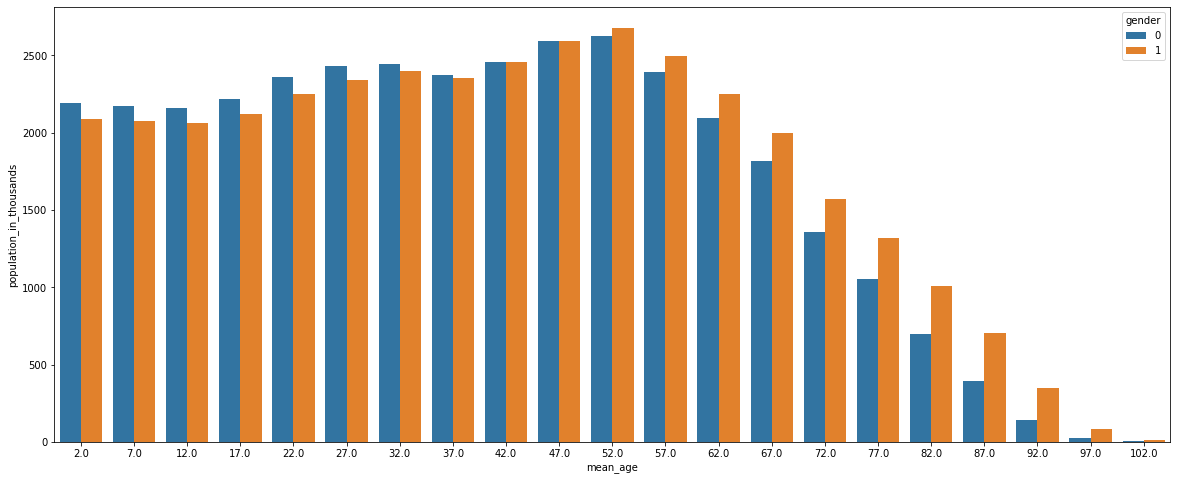

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='mean_age',y='population_in_thousands',hue='gender',data=age_gen_df,ci=None)

Here 0 is male and 1 is female

OBSERVATIONS:  
--Largest group of people are traveling at the age >45 and < 60 age.  
-- We can observe after 50 age population bucket gradually decreased  
-- We can see upto 57 age Male population is more than Female but later female population is more than male as age increased.  
-- We can observe Women lived longer than Men


**Population count in each country**

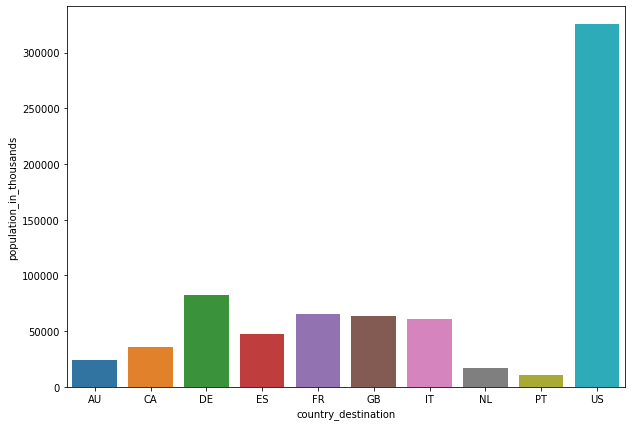

In [ ]:

plt.figure(figsize=(10,7))
pop=age_gen_df.groupby('country_destination')['population_in_thousands'].sum()
sns.barplot(x=pop.index,y=pop,ci=None)